In [ ]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [ ]:
# reading the dataset
df= pd.read_csv('/content/drive/MyDrive/Synthetic_Financial_datasets_log.csv')

In [ ]:
# printing the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# print the shape of the data
df.shape

(6362620, 11)

In [ ]:
# printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# checking the missing values in the data
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# finding duplicate values
df.duplicated().sum()

0

In [ ]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("****"*10)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
****************************************
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
****************************************
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64
****************************************


Exploratory Data Analysis(EDA)

In [ ]:
# describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


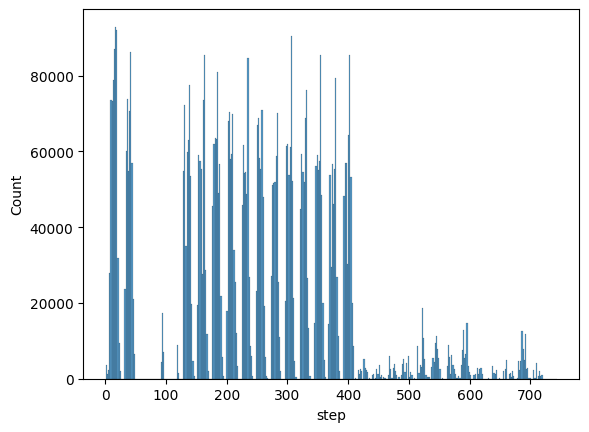

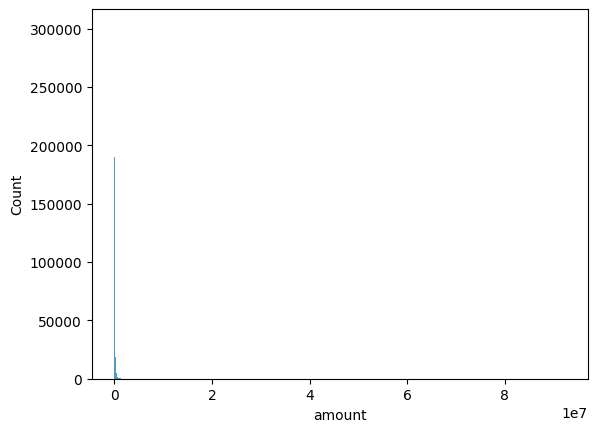

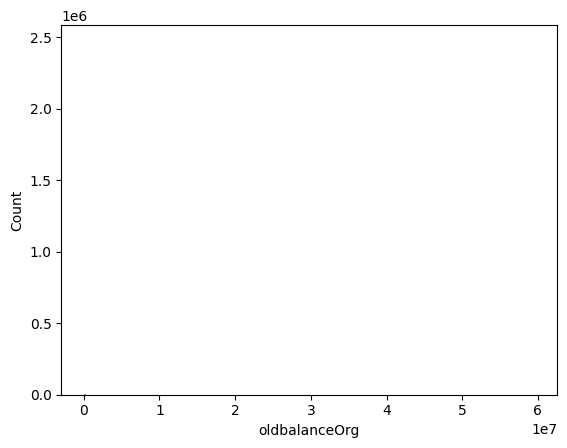

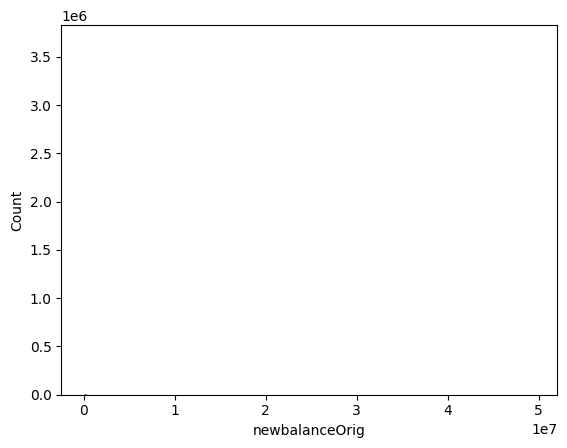

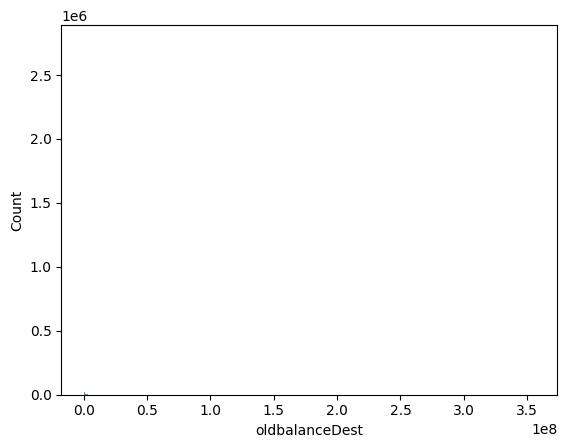

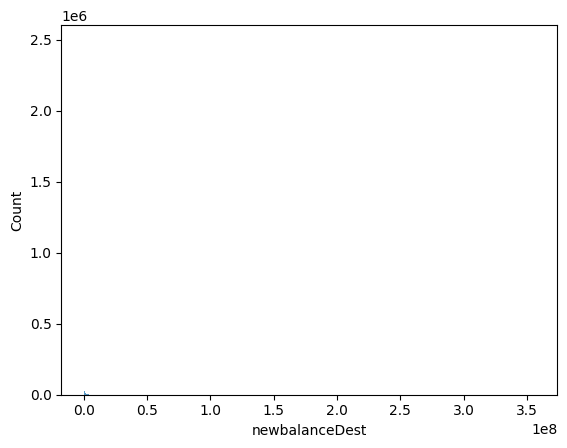

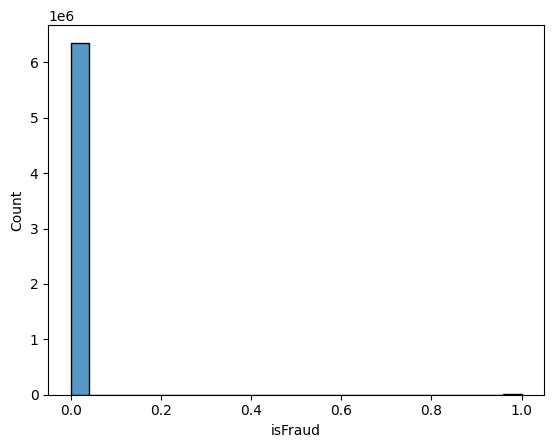

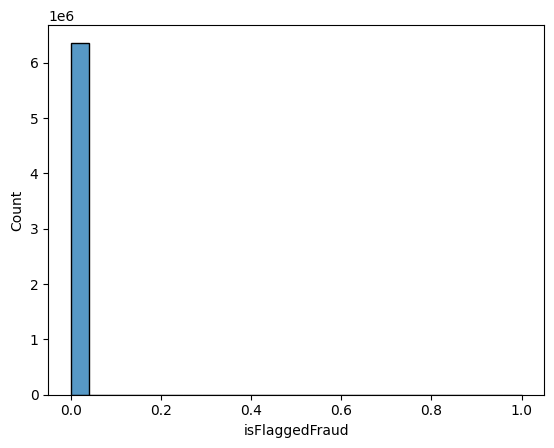

In [ ]:
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

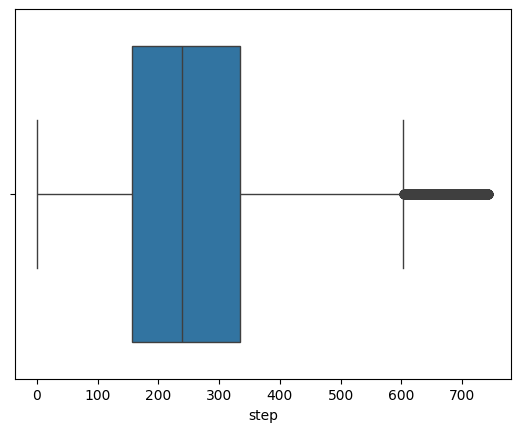

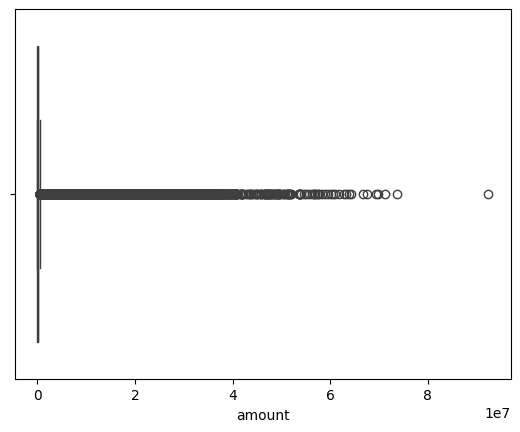

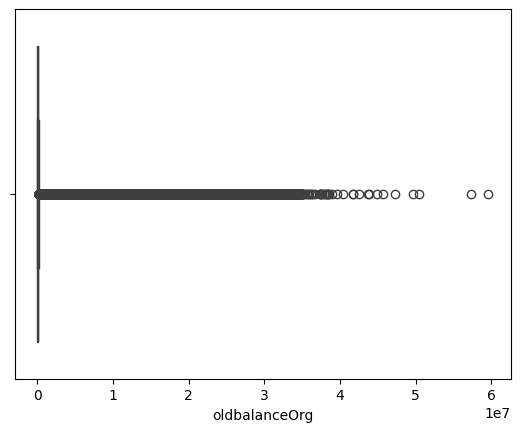

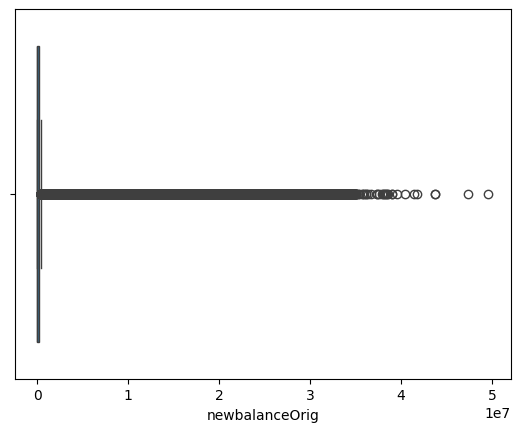

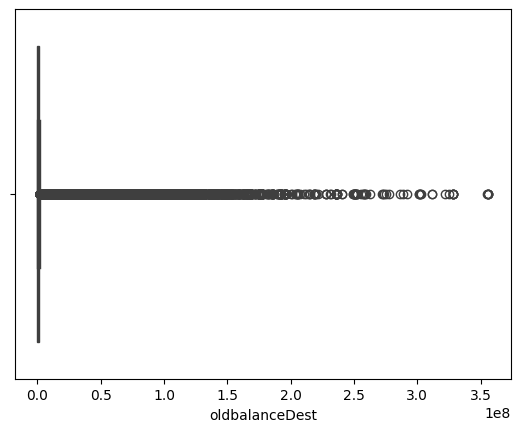

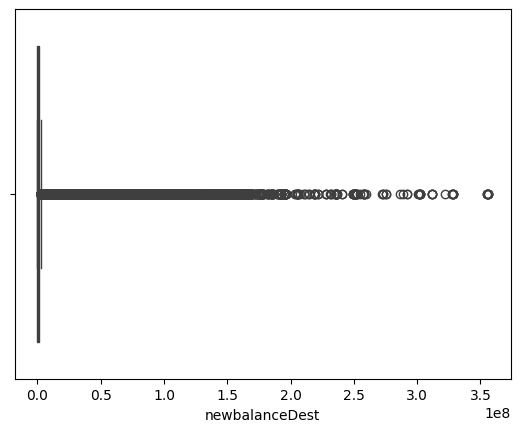

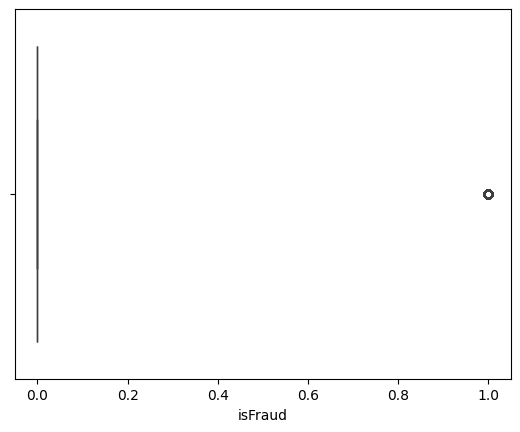

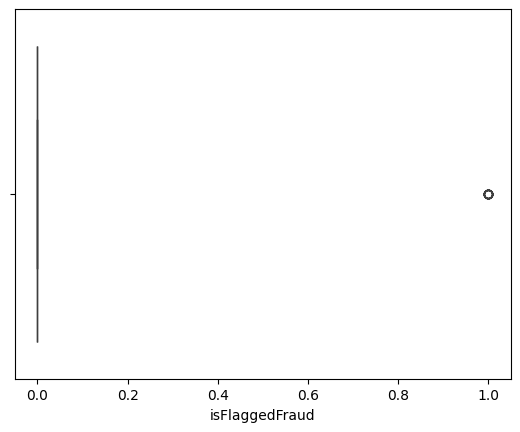

In [ ]:
#Boxplot-to-identify outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


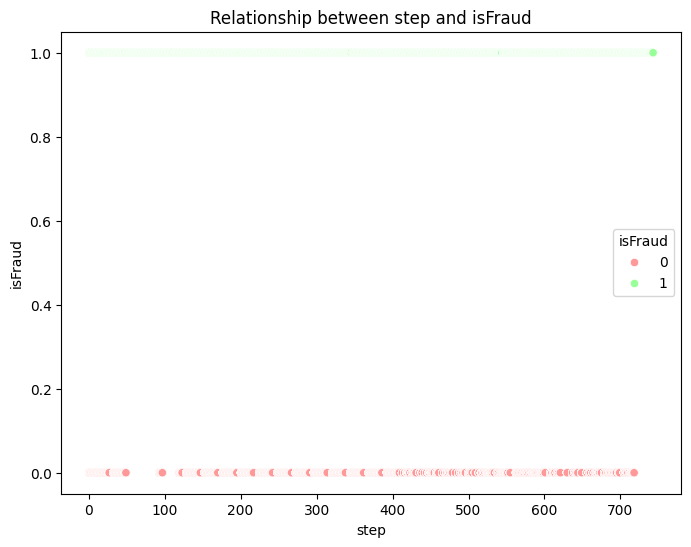

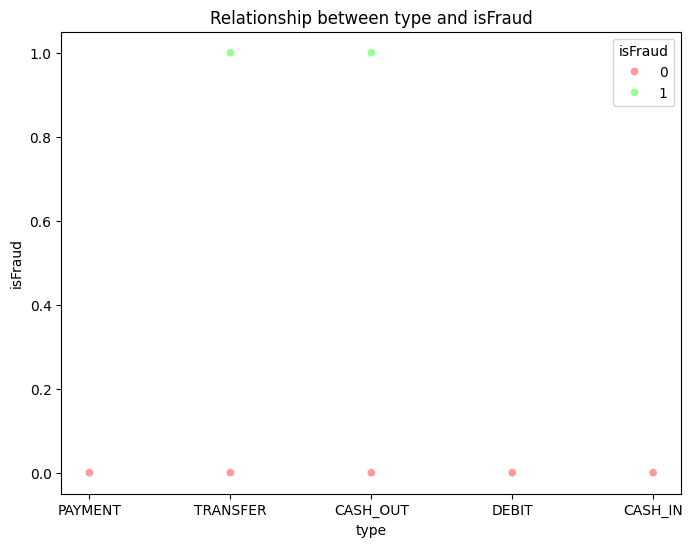

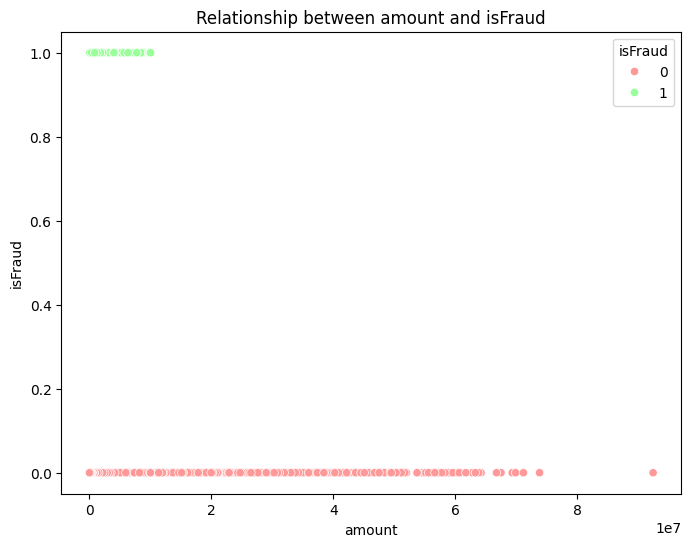

In [ ]:
# Scatter plot to understand the relationship
for i in ['step', 'type', 'amount']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=i, y='isFraud', hue='isFraud', palette=['#FF9999', '#99FF99'])
    plt.title(f'Relationship between {i} and isFraud')
    plt.xlabel(i)
    plt.ylabel('isFraud')
    plt.show()

In [ ]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
df.groupby('type').count()['amount']

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: amount, dtype: int64

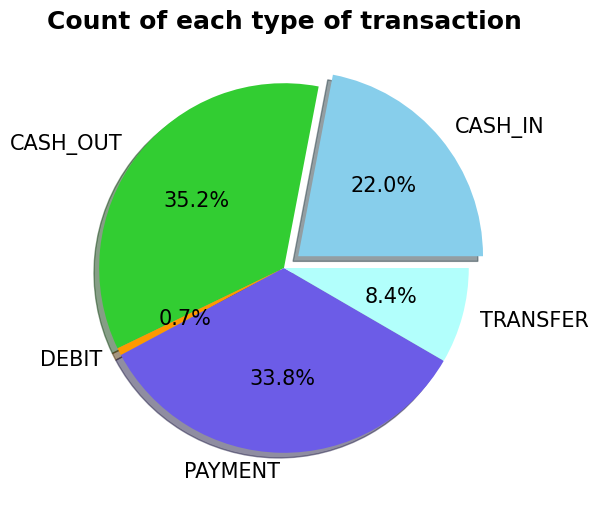

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'type' and count the number of transactions for each type
counts = df.groupby('type').count()['amount']

# Set the figure size
plt.figure(figsize=(6, 6))

# Define the color scheme
colors = {
    'Sky Blue': '#87CEEB',
    'Lime Green': '#32CD32',
    'Burnt Orange': '#FF9900',
    'Deep Purple': '#6c5ce7',
    'Mint Green': '#B2FFFC'
}

# Create an explode list with 0.1 for the first element and 0 for the rest
explode = [0.1] + [0] * (len(counts) - 1)

# Create a pie chart
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    colors=list(colors.values()),
    shadow=True,
    explode=explode,
    textprops={'fontsize': 15}
)

# Set the title of the plot
plt.title('Count of each type of transaction', fontweight='bold', fontsize=18)

# Display the plot
plt.show()


In [ ]:
# Check the distribution of fraud labels
fraud_counts = df['isFraud'].value_counts()
print("Number of frauds:")
print(fraud_counts)


Number of frauds:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [ ]:
# Calculate the percentage of frauds in the dataset
total_entries = len(df)
percentage_frauds = (fraud_counts[1] / total_entries) * 100
print("Percentage of frauds: {:.2f}%".format(percentage_frauds))

Percentage of frauds: 0.13%


Number of frauds:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


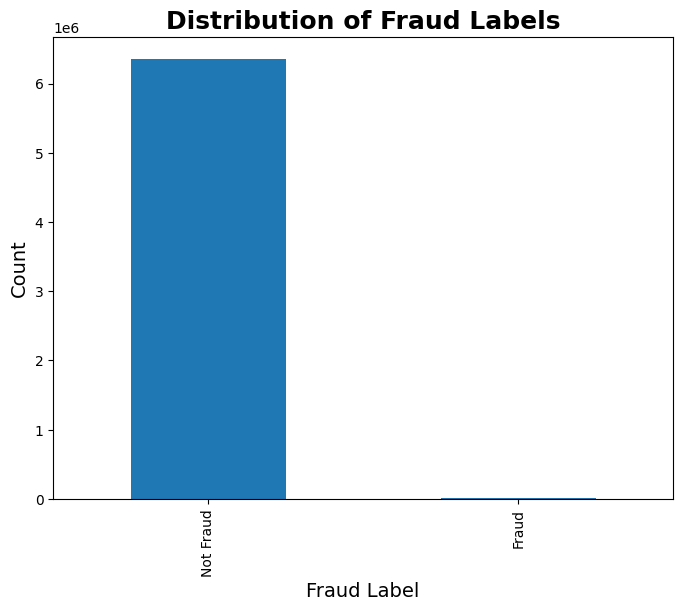

In [ ]:
# Check the distribution of fraud labels
fraud_counts = df['isFraud'].value_counts()
print("Number of frauds:")
print(fraud_counts)

# Create a bar chart to visualize the distribution of fraud labels
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar')
plt.title('Distribution of Fraud Labels', fontweight='bold', fontsize=18, fontfamily='times new roman')
plt.xlabel('Fraud Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

In [ ]:
df.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

In [ ]:
#corelation with heatmap to interpret the relation and multicollinearity
s=df.select_dtypes(include="number").corr()

<Axes: >

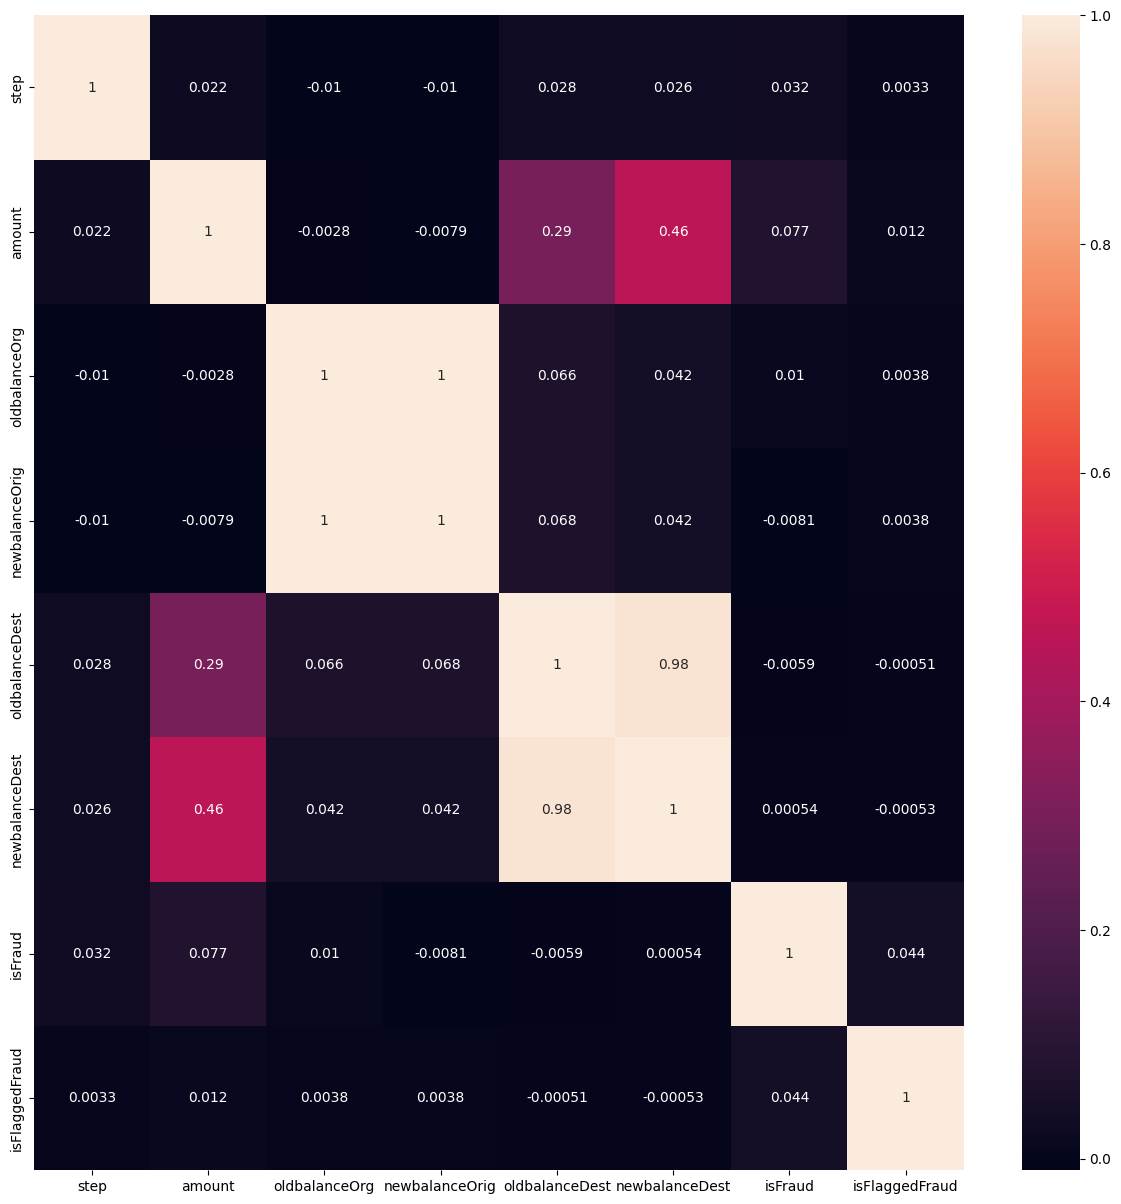

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(s, annot=True)

In [ ]:
# Removing the columns that are not necessary for the data modeling
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [ ]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [ ]:
# printing the data frame after removing the columns
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [ ]:
# encoding the categorical column into numerical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [ ]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
#create a logistic regression object
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

 **logistic regression**

In [ ]:
# testing the model on test data
y_pred = lr.predict(X_test)

In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)*100

# precision of the logistic regression
precision_lr = precision_score(y_test, y_pred)*100

# recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)*100

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 99.87086032693031
Precision of logistic regression 15.909090909090908
Recall of logistic regression 0.2874743326488706
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.16      0.00      0.01      2435

    accuracy                           1.00   1908786
   macro avg       0.58      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



K-Nearest Neighbors

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# Initializing the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Training the KNN model
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Calculating the performance metrics

# Accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred) * 100

# Precision of the KNN model
precision_knn = precision_score(y_test, y_pred) * 100

# Recall of the KNN model
recall_knn = recall_score(y_test, y_pred) * 100

# Classification report
classification_knn = classification_report(y_test, y_pred)

# Print the performance metrics in percentage form
print(f"Accuracy of KNN: {accuracy_knn:.2f}%")
print(f"Precision of KNN: {precision_knn:.2f}%")
print(f"Recall of KNN: {recall_knn:.2f}%")
print(f"Classification Report of KNN:\n{classification_knn}")

Accuracy of KNN: 99.90%
Precision of KNN: 88.28%
Recall of KNN: 26.00%
Classification Report of KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.26      0.40      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.63      0.70   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
# Initializing the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model
dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt.predict(X_test)

# Calculating the performance metrics

# Accuracy of the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred) * 100

# Precision of the Decision Tree model
precision_dt = precision_score(y_test, y_pred) * 100

# Recall of the Decision Tree model
recall_dt = recall_score(y_test, y_pred) * 100

# Classification report
classification_dt = classification_report(y_test, y_pred)

# Print the performance metrics in percentage form
print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}%")
print(f"Precision of Decision Tree: {precision_dt:.2f}%")
print(f"Recall of Decision Tree: {recall_dt:.2f}%")
print(f"Classification Report of Decision Tree:\n{classification_dt}")

Accuracy of Decision Tree: 99.87%
Precision of Decision Tree: 47.17%
Recall of Decision Tree: 44.56%
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.47      0.45      0.46      2435

    accuracy                           1.00   1908786
   macro avg       0.74      0.72      0.73   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:

import pandas as pd


performance_df = pd.DataFrame({
    'models': ['Logistic Regression','KNeighborsClassifier','Decision Tree'],
    'accuracy': [accuracy_knn, accuracy_lr, accuracy_dt],
    'precision': [precision_knn, precision_lr, precision_dt],
    'recall': [recall_knn, recall_lr, recall_dt]
})

performance_df

,models,accuracy,precision,recall
0,Logistic Regression,99.901194,88.284519,25.995893
1,KNeighborsClassifier,99.870860,15.909091,0.287474
2,Decision Tree,99.865621,47.173913,44.558522


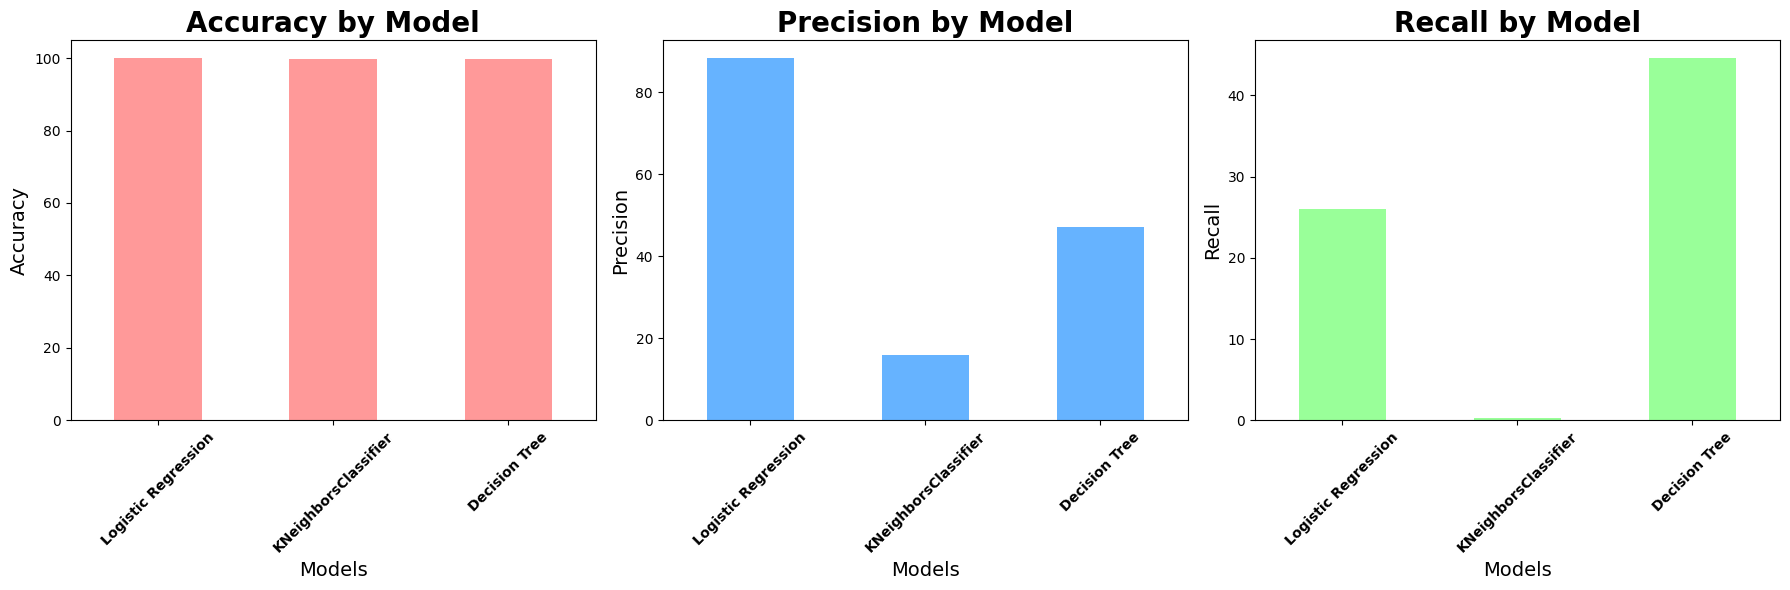

In [ ]:
# Define the metrics and the new color scheme
metrics = ['accuracy', 'precision', 'recall']
colors = ['#FF9999', '#66B3FF', '#99FF99']

# Create a figure and multiple axis objects
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

for i, metric in enumerate(metrics):
    performance_df.plot(kind='bar', x='models', y=metric, ax=ax[i], color=colors[i], legend=False)

    # Set the tick labels and rotation
    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight='bold')

    # Adding labels
    ax[i].set_xlabel('Models', fontsize=14)
    ax[i].set_ylabel(metric.capitalize(), fontsize=14)  # Use the metric name as ylabel
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize=20, fontweight='bold')  # Set dynamic title

plt.tight_layout()
plt.show()

In [ ]:
#prediction
#features=[type,amount,oldbalanceOrg,newbalanceOrig ]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
prediction = dt.predict(features)
print("Predicted class:", prediction[0])
if prediction[0] == 1:
    print("Predicted class: fraud")
else:
    print("Predicted class: not fraud")

Predicted class: 1
Predicted class: fraud
